In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from sklearn import metrics
import pickle

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Real_Combine.csv')
df = df.dropna()
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [3]:
regressor = xgb.XGBRegressor()
regressor.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [4]:
print("R2(train data): {}".format(regressor.score(X_train, y_train)))
print("R2(test data): {}".format(regressor.score(X_test, y_test)))

R2(train data): 0.9997225014495299
R2(test data): 0.567553023623503


In [5]:
score=cross_val_score(regressor, X, y, cv=10)
score.mean()

-0.07380393688672429

<AxesSubplot:xlabel='VM', ylabel='Density'>

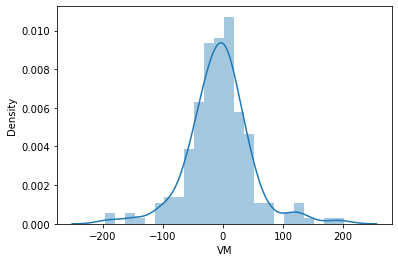

In [6]:
prediction=regressor.predict(X_test)
sns.distplot(y_test-prediction)

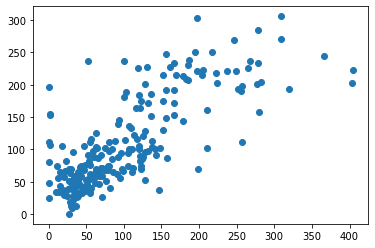

In [7]:
plt.scatter(y_test, prediction)

In [8]:
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]
learning_rate = ['0.01', '0.05', '0.2', '0.5', '0.6', '1']
max_depth = [int(x) for x in np.linspace(5,30,num=6)]
subsample = [0.7,0.6,0.8]
min_child_weight=[3,4,5,6,7]

In [9]:
random_grid={
    'n_estimators':n_estimators,
    'learning_rate':learning_rate,
    'max_depth':max_depth,
    'subsample':subsample,
    'min_child_weight':min_child_weight,
}

In [10]:
regressor = xgb.XGBRegressor()

In [11]:
xg = RandomizedSearchCV(estimator=regressor, param_distributions=random_grid, 
                        scoring='neg_mean_squared_error', n_iter=100, cv=10, verbose=2,
                      random_state=0)

In [12]:
xg.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV] END learning_rate=1, max_depth=20, min_child_weight=4, n_estimators=1100, subsample=0.7; total time=   0.3s
[CV] END learning_rate=1, max_depth=20, min_child_weight=4, n_estimators=1100, subsample=0.7; total time=   0.3s
[CV] END learning_rate=1, max_depth=20, min_child_weight=4, n_estimators=1100, subsample=0.7; total time=   0.3s
[CV] END learning_rate=1, max_depth=20, min_child_weight=4, n_estimators=1100, subsample=0.7; total time=   0.2s
[CV] END learning_rate=1, max_depth=20, min_child_weight=4, n_estimators=1100, subsample=0.7; total time=   0.3s
[CV] END learning_rate=1, max_depth=20, min_child_weight=4, n_estimators=1100, subsample=0.7; total time=   0.2s
[CV] END learning_rate=1, max_depth=20, min_child_weight=4, n_estimators=1100, subsample=0.7; total time=   0.3s
[CV] END learning_rate=1, max_depth=20, min_child_weight=4, n_estimators=1100, subsample=0.7; total time=   0.3s
[CV] END learning_rate=1, max_d

[CV] END learning_rate=0.2, max_depth=20, min_child_weight=3, n_estimators=500, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.2, max_depth=20, min_child_weight=3, n_estimators=500, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.2, max_depth=20, min_child_weight=3, n_estimators=500, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.2, max_depth=20, min_child_weight=3, n_estimators=500, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.2, max_depth=20, min_child_weight=3, n_estimators=500, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=20, min_child_weight=3, n_estimators=500, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=20, min_child_weight=3, n_estimators=500, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.2, max_depth=20, min_child_weight=3, n_estimators=500, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=10, min_child_weight=7, n_estimators=400, subsamp

[CV] END learning_rate=0.01, max_depth=15, min_child_weight=5, n_estimators=1200, subsample=0.8; total time=   1.2s
[CV] END learning_rate=0.01, max_depth=15, min_child_weight=5, n_estimators=1200, subsample=0.8; total time=   1.2s
[CV] END learning_rate=0.01, max_depth=15, min_child_weight=5, n_estimators=1200, subsample=0.8; total time=   1.3s
[CV] END learning_rate=0.01, max_depth=15, min_child_weight=5, n_estimators=1200, subsample=0.8; total time=   1.5s
[CV] END learning_rate=0.01, max_depth=15, min_child_weight=5, n_estimators=1200, subsample=0.8; total time=   1.3s
[CV] END learning_rate=0.01, max_depth=15, min_child_weight=5, n_estimators=1200, subsample=0.8; total time=   1.3s
[CV] END learning_rate=0.05, max_depth=30, min_child_weight=3, n_estimators=1100, subsample=0.6; total time=   1.6s
[CV] END learning_rate=0.05, max_depth=30, min_child_weight=3, n_estimators=1100, subsample=0.6; total time=   1.8s
[CV] END learning_rate=0.05, max_depth=30, min_child_weight=3, n_estimat

[CV] END learning_rate=0.6, max_depth=10, min_child_weight=5, n_estimators=900, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.6, max_depth=10, min_child_weight=5, n_estimators=900, subsample=0.6; total time=   0.6s
[CV] END learning_rate=0.6, max_depth=10, min_child_weight=5, n_estimators=900, subsample=0.6; total time=   0.6s
[CV] END learning_rate=0.6, max_depth=10, min_child_weight=5, n_estimators=900, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=30, min_child_weight=3, n_estimators=700, subsample=0.8; total time=   1.5s
[CV] END learning_rate=0.05, max_depth=30, min_child_weight=3, n_estimators=700, subsample=0.8; total time=   1.5s
[CV] END learning_rate=0.05, max_depth=30, min_child_weight=3, n_estimators=700, subsample=0.8; total time=   1.5s
[CV] END learning_rate=0.05, max_depth=30, min_child_weight=3, n_estimators=700, subsample=0.8; total time=   1.5s
[CV] END learning_rate=0.05, max_depth=30, min_child_weight=3, n_estimators=700, sub

[CV] END learning_rate=0.05, max_depth=15, min_child_weight=5, n_estimators=1200, subsample=0.7; total time=   1.9s
[CV] END learning_rate=0.05, max_depth=15, min_child_weight=5, n_estimators=1200, subsample=0.7; total time=   1.9s
[CV] END learning_rate=0.05, max_depth=5, min_child_weight=4, n_estimators=800, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=5, min_child_weight=4, n_estimators=800, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=5, min_child_weight=4, n_estimators=800, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=5, min_child_weight=4, n_estimators=800, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=5, min_child_weight=4, n_estimators=800, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=5, min_child_weight=4, n_estimators=800, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=5, min_child_weight=4, n_estimators=800, subs

[CV] END learning_rate=0.05, max_depth=10, min_child_weight=3, n_estimators=800, subsample=0.6; total time=   0.9s
[CV] END learning_rate=0.05, max_depth=10, min_child_weight=3, n_estimators=800, subsample=0.6; total time=   1.0s
[CV] END learning_rate=0.05, max_depth=10, min_child_weight=3, n_estimators=800, subsample=0.6; total time=   1.0s
[CV] END learning_rate=0.05, max_depth=10, min_child_weight=3, n_estimators=800, subsample=0.6; total time=   1.1s
[CV] END learning_rate=0.05, max_depth=10, min_child_weight=3, n_estimators=800, subsample=0.6; total time=   1.1s
[CV] END learning_rate=0.05, max_depth=10, min_child_weight=3, n_estimators=800, subsample=0.6; total time=   1.0s
[CV] END learning_rate=0.05, max_depth=10, min_child_weight=3, n_estimators=800, subsample=0.6; total time=   1.0s
[CV] END learning_rate=0.05, max_depth=10, min_child_weight=3, n_estimators=800, subsample=0.6; total time=   1.0s
[CV] END learning_rate=0.05, max_depth=10, min_child_weight=3, n_estimators=800,

[CV] END learning_rate=0.01, max_depth=30, min_child_weight=7, n_estimators=700, subsample=0.6; total time=   1.2s
[CV] END learning_rate=0.01, max_depth=30, min_child_weight=7, n_estimators=700, subsample=0.6; total time=   1.3s
[CV] END learning_rate=0.01, max_depth=30, min_child_weight=7, n_estimators=700, subsample=0.6; total time=   1.3s
[CV] END learning_rate=0.01, max_depth=30, min_child_weight=7, n_estimators=700, subsample=0.6; total time=   2.1s
[CV] END learning_rate=0.01, max_depth=30, min_child_weight=7, n_estimators=700, subsample=0.6; total time=   1.1s
[CV] END learning_rate=0.01, max_depth=30, min_child_weight=7, n_estimators=700, subsample=0.6; total time=   1.3s
[CV] END learning_rate=0.01, max_depth=30, min_child_weight=7, n_estimators=700, subsample=0.6; total time=   0.9s
[CV] END learning_rate=0.01, max_depth=30, min_child_weight=7, n_estimators=700, subsample=0.6; total time=   0.8s
[CV] END learning_rate=0.05, max_depth=20, min_child_weight=7, n_estimators=700,

[CV] END learning_rate=1, max_depth=15, min_child_weight=3, n_estimators=1000, subsample=0.7; total time=   0.4s
[CV] END learning_rate=1, max_depth=15, min_child_weight=3, n_estimators=1000, subsample=0.7; total time=   0.4s
[CV] END learning_rate=1, max_depth=15, min_child_weight=3, n_estimators=1000, subsample=0.7; total time=   0.4s
[CV] END learning_rate=1, max_depth=15, min_child_weight=3, n_estimators=1000, subsample=0.7; total time=   0.5s
[CV] END learning_rate=1, max_depth=15, min_child_weight=3, n_estimators=1000, subsample=0.7; total time=   0.5s
[CV] END learning_rate=0.6, max_depth=15, min_child_weight=3, n_estimators=900, subsample=0.6; total time=   0.7s
[CV] END learning_rate=0.6, max_depth=15, min_child_weight=3, n_estimators=900, subsample=0.6; total time=   0.6s
[CV] END learning_rate=0.6, max_depth=15, min_child_weight=3, n_estimators=900, subsample=0.6; total time=   0.6s
[CV] END learning_rate=0.6, max_depth=15, min_child_weight=3, n_estimators=900, subsample=0.6

[CV] END learning_rate=0.6, max_depth=25, min_child_weight=6, n_estimators=1200, subsample=0.6; total time=   0.6s
[CV] END learning_rate=0.6, max_depth=25, min_child_weight=6, n_estimators=1200, subsample=0.6; total time=   0.7s
[CV] END learning_rate=0.6, max_depth=25, min_child_weight=6, n_estimators=1200, subsample=0.6; total time=   0.6s
[CV] END learning_rate=0.2, max_depth=10, min_child_weight=7, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=10, min_child_weight=7, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=10, min_child_weight=7, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=10, min_child_weight=7, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=10, min_child_weight=7, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=10, min_child_weight=7, n_estimators=100, subsa

[CV] END learning_rate=0.6, max_depth=25, min_child_weight=4, n_estimators=800, subsample=0.6; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=800, subsample=0.6; total time=   1.0s
[CV] END learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=800, subsample=0.6; total time=   1.5s
[CV] END learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=800, subsample=0.6; total time=   1.4s
[CV] END learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=800, subsample=0.6; total time=   1.1s
[CV] END learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=800, subsample=0.6; total time=   1.2s
[CV] END learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=800, subsample=0.6; total time=   1.0s
[CV] END learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=800, subsample=0.6; total time=   1.0s
[CV] END learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=800, 

[CV] END learning_rate=0.2, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.8; to

[CV] END learning_rate=0.6, max_depth=15, min_child_weight=4, n_estimators=1000, subsample=0.7; total time=   0.7s
[CV] END learning_rate=0.6, max_depth=15, min_child_weight=4, n_estimators=1000, subsample=0.7; total time=   0.8s
[CV] END learning_rate=0.6, max_depth=15, min_child_weight=4, n_estimators=1000, subsample=0.7; total time=   0.7s
[CV] END learning_rate=0.6, max_depth=15, min_child_weight=4, n_estimators=1000, subsample=0.7; total time=   0.7s
[CV] END learning_rate=0.6, max_depth=15, min_child_weight=4, n_estimators=1000, subsample=0.7; total time=   0.6s
[CV] END learning_rate=0.6, max_depth=15, min_child_weight=4, n_estimators=1000, subsample=0.7; total time=   0.7s
[CV] END learning_rate=0.6, max_depth=15, min_child_weight=4, n_estimators=1000, subsample=0.7; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=20, min_child_weight=7, n_estimators=900, subsample=0.6; total time=   1.3s
[CV] END learning_rate=0.05, max_depth=20, min_child_weight=7, n_estimators=900,

[CV] END learning_rate=0.2, max_depth=15, min_child_weight=7, n_estimators=900, subsample=0.6; total time=   1.2s
[CV] END learning_rate=0.2, max_depth=15, min_child_weight=7, n_estimators=900, subsample=0.6; total time=   1.2s
[CV] END learning_rate=0.2, max_depth=15, min_child_weight=7, n_estimators=900, subsample=0.6; total time=   1.1s
[CV] END learning_rate=0.2, max_depth=15, min_child_weight=7, n_estimators=900, subsample=0.6; total time=   1.5s
[CV] END learning_rate=0.2, max_depth=15, min_child_weight=7, n_estimators=900, subsample=0.6; total time=   1.3s
[CV] END learning_rate=0.6, max_depth=5, min_child_weight=7, n_estimators=1100, subsample=0.6; total time=   0.7s
[CV] END learning_rate=0.6, max_depth=5, min_child_weight=7, n_estimators=1100, subsample=0.6; total time=   0.6s
[CV] END learning_rate=0.6, max_depth=5, min_child_weight=7, n_estimators=1100, subsample=0.6; total time=   0.6s
[CV] END learning_rate=0.6, max_depth=5, min_child_weight=7, n_estimators=1100, subsampl

[CV] END learning_rate=0.05, max_depth=25, min_child_weight=4, n_estimators=100, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=25, min_child_weight=4, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=25, min_child_weight=4, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=30, min_child_weight=5, n_estimators=1200, subsample=0.6; total time=   1.2s
[CV] END learning_rate=0.5, max_depth=30, min_child_weight=5, n_estimators=1200, subsample=0.6; total time=   1.3s
[CV] END learning_rate=0.5, max_depth=30, min_child_weight=5, n_estimators=1200, subsample=0.6; total time=   1.5s
[CV] END learning_rate=0.5, max_depth=30, min_child_weight=5, n_estimators=1200, subsample=0.6; total time=   2.7s
[CV] END learning_rate=0.5, max_depth=30, min_child_weight=5, n_estimators=1200, subsample=0.6; total time=   1.3s
[CV] END learning_rate=0.5, max_depth=30, min_child_weight=5, n_estimators=1200,

RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,...
                                          predictor=None, random_state=None,
                                          reg_alpha=None, reg_lambda=None, ...),
                   n_iter=100,
                   param_distributions={'learning_rate': ['0.01', '0.05', '0.2',
                                                          '0.5', '0.6', '1'],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'min_child_weight': [3, 4, 5, 6, 7],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200],
                                        'subsample': [0.7, 0.6, 0.8]},
                   random_state=0, scoring='neg_mean_squared_error', verbose=2)

In [13]:
print(xg.best_params_)
print("\n",xg.best_score_)

{'subsample': 0.7, 'n_estimators': 300, 'min_child_weight': 6, 'max_depth': 25, 'learning_rate': '0.01'}

 -2730.168268055921


In [14]:
predictions = xg.predict(X_test)

<AxesSubplot:ylabel='Density'>

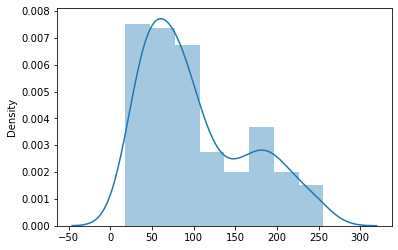

In [15]:
sns.distplot(predictions)

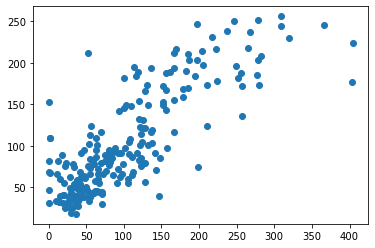

In [16]:
plt.scatter(y_test,predictions)

In [17]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 32.355067495523066
MSE: 2189.4840185579933
RMSE: 46.791922578133004
